In [87]:
# Name : Aakanksha Dipak Magaonkar
# Task : Prediction using Decision tree algorithm
# Level : Intermediate

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#Cleaning the data
df = pd.read_csv("Iris.csv")
df

,Id,SepalL,SepalW,PetalL,PetalW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,NaN,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,NaN,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,NaN,5.4,2.3,Iris-virginica


In [90]:
df['Species'].value_counts()

Iris-versicolor    49
Iris-setosa        48
Iris-virginica     47
Name: Species, dtype: int64

In [91]:
df.describe()
df = df.drop(columns='Id', axis=1)
df

,SepalL,SepalW,PetalL,PetalW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,NaN,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,NaN,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,NaN,5.4,2.3,Iris-virginica


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SepalL   141 non-null    float64
 1   SepalW   141 non-null    float64
 2   PetalL   143 non-null    float64
 3   PetalW   150 non-null    float64
 4   Species  144 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
df.isnull()

,SepalL,SepalW,PetalL,PetalW,Species
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,True,False,False,False


In [100]:
df.fillna(method='ffill',inplace = True)
df
df.isnull().sum()


SepalL     0
SepalW     0
PetalL     0
PetalW     0
Species    0
dtype: int64

<AxesSubplot:>

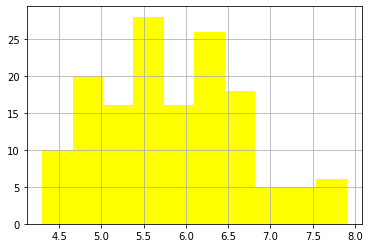

In [101]:
#Visualising the data
df['SepalL'].hist(color ="Yellow")

<AxesSubplot:>

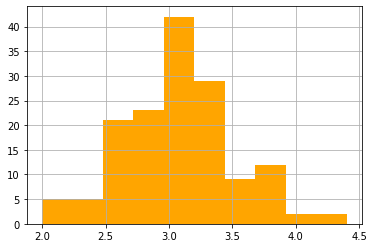

In [102]:
df["SepalW"].hist(color ="Orange")

<AxesSubplot:>

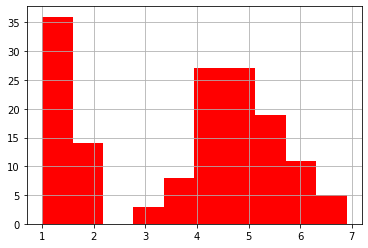

In [103]:
df["PetalL"].hist(color ="Red")

<AxesSubplot:>

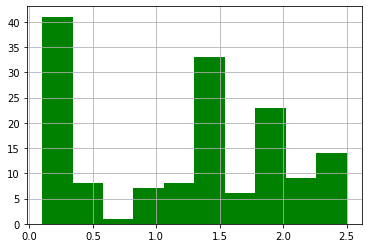

In [104]:
df["PetalW"].hist(color ="Green")

In [105]:
# Scatter Plot
colors = ['green', 'purple', 'orange']
species = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

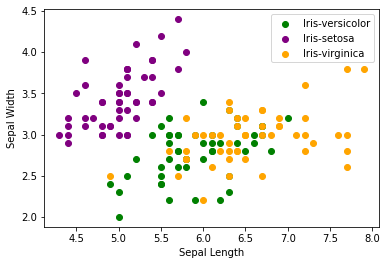

In [106]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalL'], x['SepalW'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

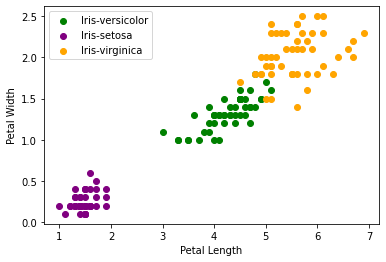

In [107]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalL'], x['PetalW'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

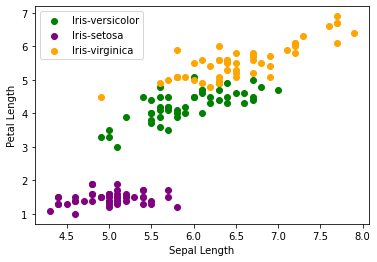

In [108]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalL'], x['PetalL'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

In [109]:
df.corr()

,SepalL,SepalW,PetalL,PetalW
SepalL,1.000000,-0.154512,0.860800,0.809402
SepalW,-0.154512,1.000000,-0.453924,-0.385711
PetalL,0.860800,-0.453924,1.000000,0.962860
PetalW,0.809402,-0.385711,0.962860,1.000000


<AxesSubplot:>

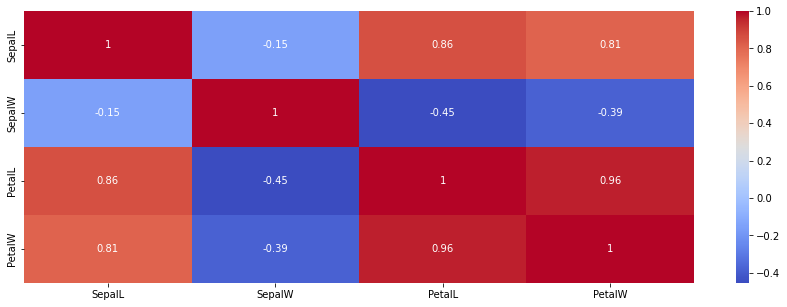

In [122]:
Corr = df.corr()
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(Corr, annot=True, ax=ax, cmap='coolwarm')

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [124]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalL,SepalW,PetalL,PetalW,Species
0,5.1,3.5,1.4,0.2,0
1,5.1,3.0,1.4,0.2,0
2,4.7,3.2,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [125]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [127]:
# Creating Decision Tree (Training)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(prediction, y_test))

Accuracy: 0.9555555555555556


In [128]:
from sklearn import tree

[Text(0.4, 0.9, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 105\nvalue = [33, 38, 34]\nclass = versicolor'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(0.6, 0.7, 'petal length (cm) <= 4.95\ngini = 0.498\nsamples = 72\nvalue = [0, 38, 34]\nclass = versicolor'),
 Text(0.4, 0.5, 'petal width (cm) <= 1.65\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = versicolor'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.6, 0.3, 'sepal width (cm) <= 3.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]\nclass = virginica')]

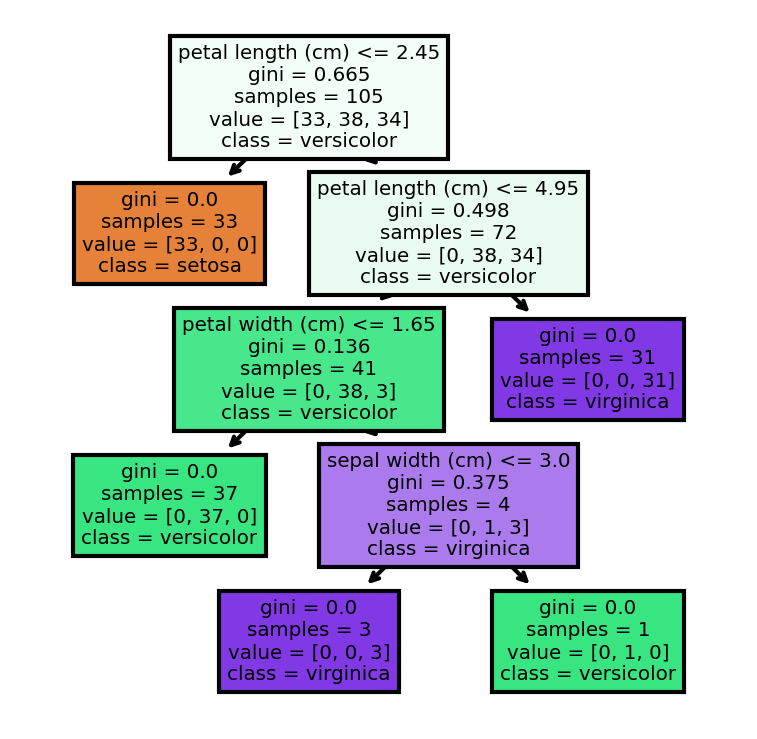

In [132]:
#Visualisation of Decision Tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True)

In [133]:
#Creating the final model of Decision tree
final_model = DecisionTreeClassifier()
final_model.fit(X, Y)

DecisionTreeClassifier()

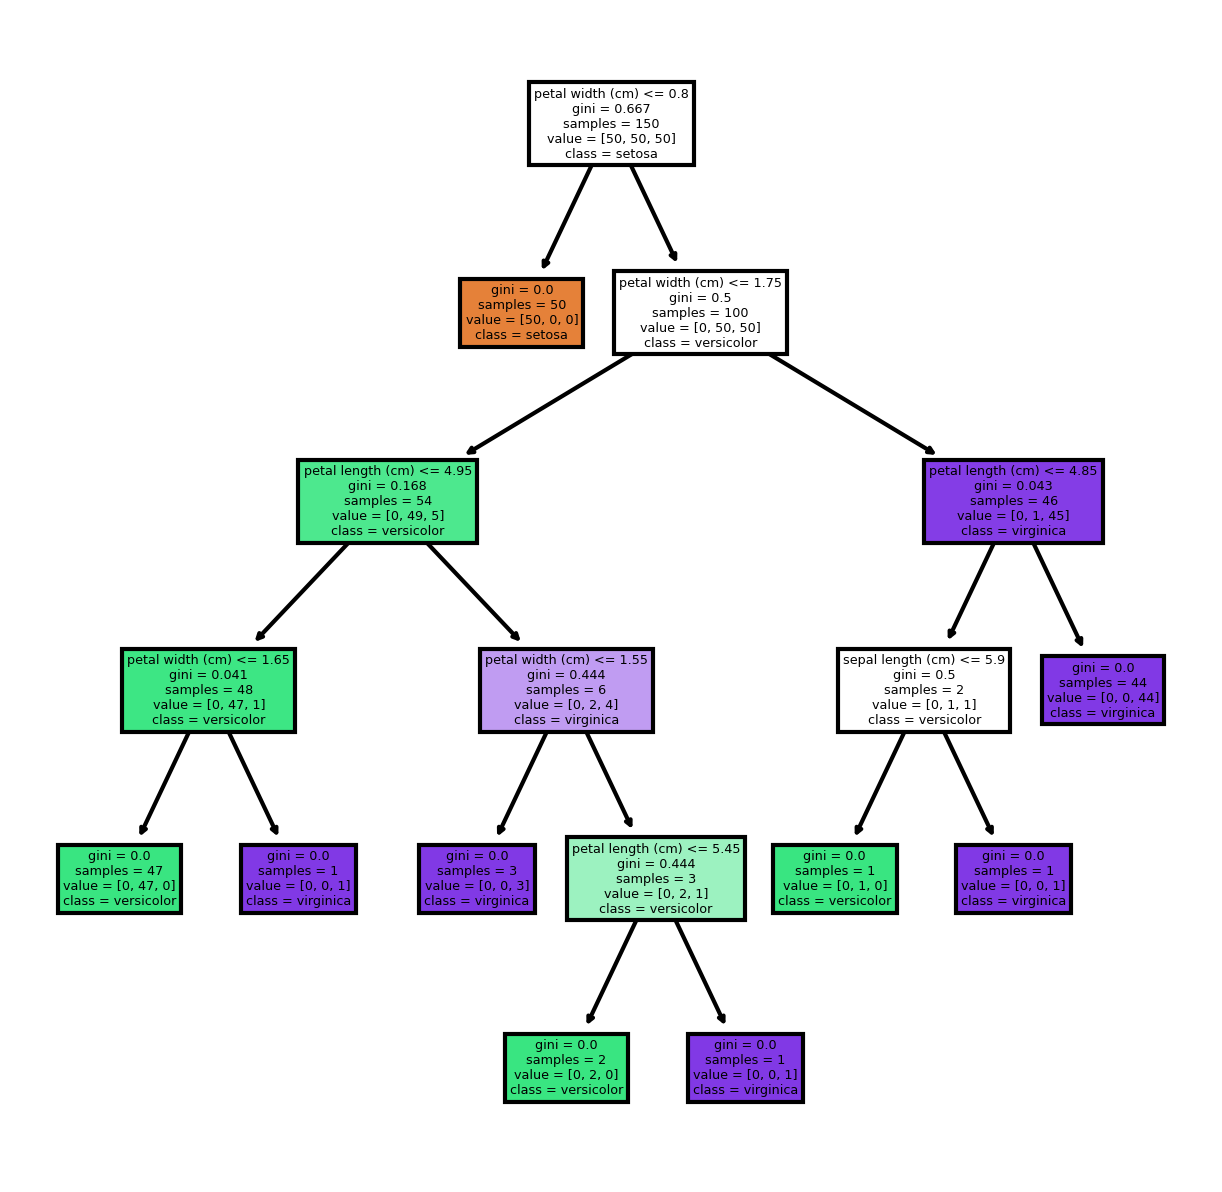

In [135]:
#The final Decision tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(final_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);